# Hw 5 Q1 

In [1]:
!python --version

Python 3.9.6


In [2]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

Merge sort
https://www.geeksforgeeks.org/python-program-for-merge-sort/

In [4]:
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = l  # Initial index of merged subarray

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1


def merge_sort(arr, l, r):
    if l < r:
        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l + (r - l) // 2

        # Sort first and second halves
        merge_sort(arr, l, m)
        merge_sort(arr, m + 1, r)
        merge(arr, l, m, r)

Insertion sort
https://www.geeksforgeeks.org/python-program-for-insertion-sort/

In [5]:
def insertion_sort(arr):
    n = len(arr)  # Get the length of the array

    if n <= 1:
        return  # If the array has 0 or 1 element, it is already sorted, so return

    for i in range(1, n):  # Iterate over the array starting from the second element
        key = arr[i]  # Store the current element as the key to be inserted in the right position
        j = i - 1
        while j >= 0 and key < arr[j]:  # Move elements greater than key one position ahead
            arr[j + 1] = arr[j]  # Shift elements to the right
            j -= 1
        arr[j + 1] = key  # Insert the key in the correct position

Define n values we want to test both algorithms with

In [6]:
n_values = [i for i in range(200)]

Define arrays to hold times for each algorithm

In [7]:
merge_times = []
insertion_times = []

# Experiment

In [8]:
for n in n_values:
    lst = np.random.randint(0, 10000, size=n)
    
    merge_time = insertion_time = 0
    iterations = 1000
    for _ in range(iterations):
        # merge sort
        merge_array = deepcopy(lst) # deepcopy to not mess up original list
        start_time = time.time()
        merge_sort(merge_array, 0, len(merge_array) - 1)
        merge_time += time.time() - start_time

        # insertion sort
        insertion_array = deepcopy(lst)
        start_time = time.time()
        insertion_sort(insertion_array)
        insertion_time += time.time() - start_time
        
    merge_times.append(merge_time / iterations)
    insertion_times.append(insertion_time / iterations)
    
    print('finished:', n)

finished: 0
finished: 1
finished: 2
finished: 3
finished: 4
finished: 5
finished: 6
finished: 7
finished: 8
finished: 9
finished: 10
finished: 11
finished: 12
finished: 13
finished: 14
finished: 15
finished: 16
finished: 17
finished: 18
finished: 19
finished: 20
finished: 21
finished: 22
finished: 23
finished: 24
finished: 25
finished: 26
finished: 27
finished: 28
finished: 29
finished: 30
finished: 31
finished: 32
finished: 33
finished: 34
finished: 35
finished: 36
finished: 37
finished: 38
finished: 39
finished: 40
finished: 41
finished: 42
finished: 43
finished: 44
finished: 45
finished: 46
finished: 47
finished: 48
finished: 49
finished: 50
finished: 51
finished: 52
finished: 53
finished: 54
finished: 55
finished: 56
finished: 57
finished: 58
finished: 59
finished: 60
finished: 61
finished: 62
finished: 63
finished: 64
finished: 65
finished: 66
finished: 67
finished: 68
finished: 69
finished: 70
finished: 71
finished: 72
finished: 73
finished: 74
finished: 75
finished: 76
finished:

# Results

In [17]:
# Averages
print(f'Merge Sort: {np.mean(merge_times):.3}')
print(f'Insertion Sort: {np.mean(insertion_times):.3}')
# Max
print(f'Merge Sort: {np.max(merge_times):.3}')
print(f'Insertion Sort: {np.max(insertion_times):.3}')
# Sum
print(f'Merge Sort: {np.sum(merge_times):.3}')
print(f'Insertion Sort: {np.sum(insertion_times):.3}')

Merge Sort: 0.000212
Insertion Sort: 0.000641
Merge Sort: 0.000445
Insertion Sort: 0.0019
Merge Sort: 0.0425
Insertion Sort: 0.128


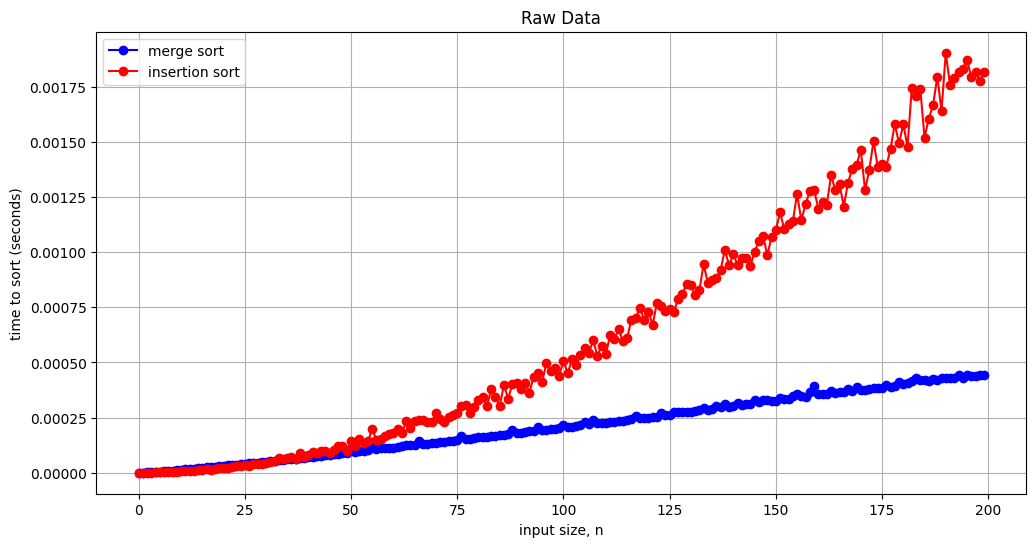

In [25]:
plt.figure(figsize=(12, 6))
plt.title('Raw Data')
plt.xlabel('input size, n')
plt.ylabel('time to sort (seconds)')
plt.plot(n_values, merge_times, 'b-o', label='merge sort')
plt.plot(n_values, insertion_times, 'r-o', label='insertion sort')
plt.legend()
plt.grid(True)

plt.show()

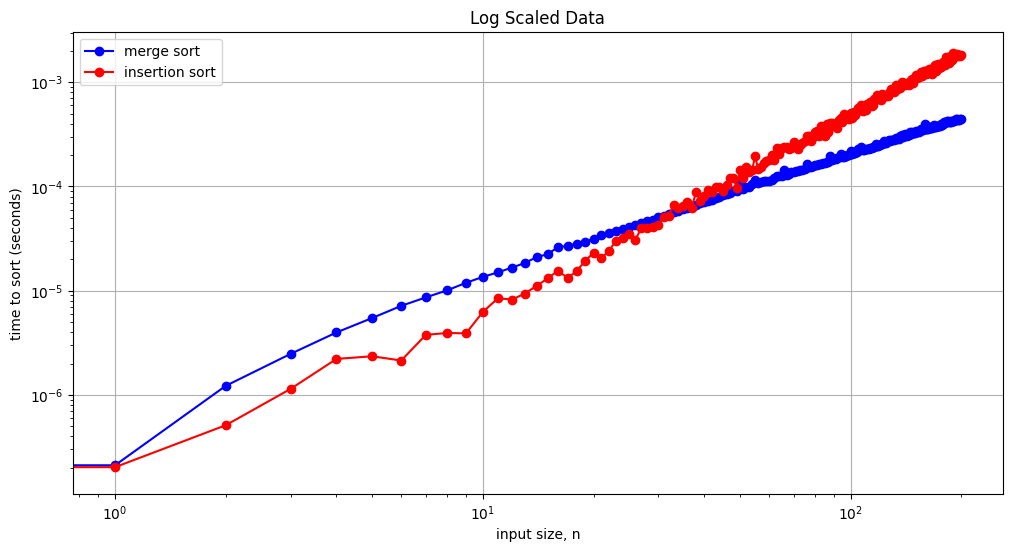

In [26]:
plt.figure(figsize=(12, 6))
plt.title('Log Scaled Data')
plt.xlabel('input size, n')
plt.ylabel('time to sort (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.plot(n_values, merge_times, 'b-o', label='merge sort')
plt.plot(n_values, insertion_times, 'r-o', label='insertion sort')
plt.legend()
plt.grid(True)

plt.show()

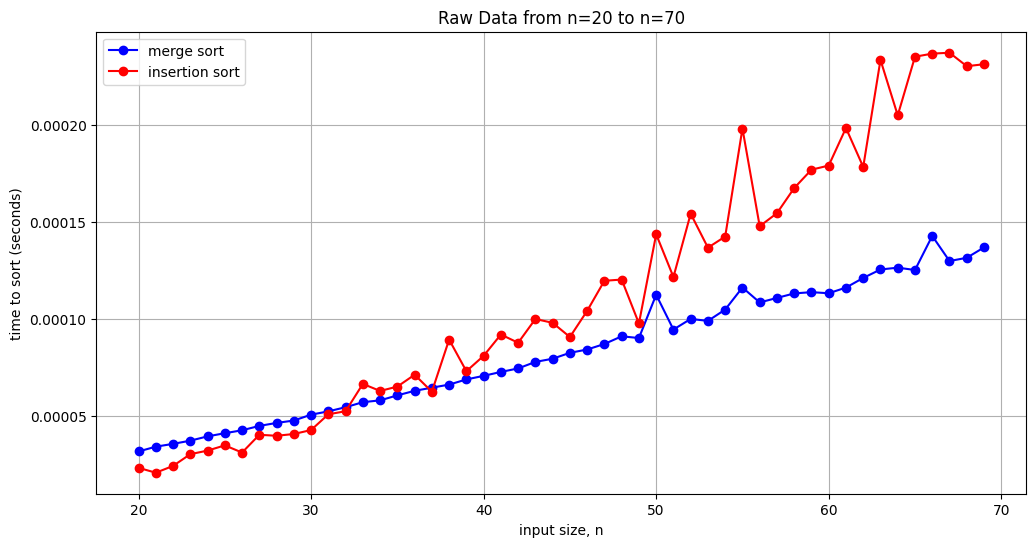

In [27]:
plt.figure(figsize=(12, 6))
plt.title('Raw Data from n=20 to n=70')
plt.xlabel('input size, n')
plt.ylabel('time to sort (seconds)')
plt.plot(n_values[20:70], merge_times[20:70], 'b-o', label='merge sort')
plt.plot(n_values[20:70], insertion_times[20:70], 'r-o', label='insertion sort')
plt.legend()
plt.grid(True)

plt.show()